In [62]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.filename)

C:\Users\krkrs\anaconda3\lib\site-packages\sklearn\datasets\data\iris.csv


In [178]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


In [97]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import graphviz
import os
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
sns.set(color_codes = True)
%matplotlib inline 
seed = 10

In [150]:
dd = pd.read_csv('C:/Users/krkrs/OneDrive/Desktop/Dataset_Project/transfusion.data')
dd.head(None)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [151]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [152]:
dd.isnull().any()

Recency (months)                              False
Frequency (times)                             False
Monetary (c.c. blood)                         False
Time (months)                                 False
whether he/she donated blood in March 2007    False
dtype: bool

In [153]:
dd.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [154]:
dd.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [155]:
dd.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [156]:
print(dd.shape)

(748, 5)


0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64


<AxesSubplot:>

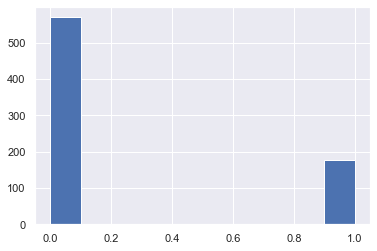

In [158]:
print(dd["whether he/she donated blood in March 2007"].value_counts())
dd["whether he/she donated blood in March 2007"].hist()

C:\Users\krkrs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\krkrs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


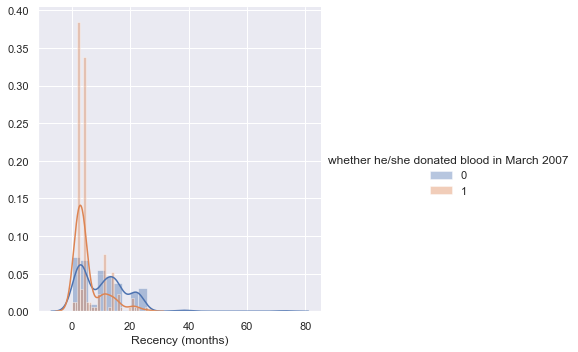

C:\Users\krkrs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\krkrs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


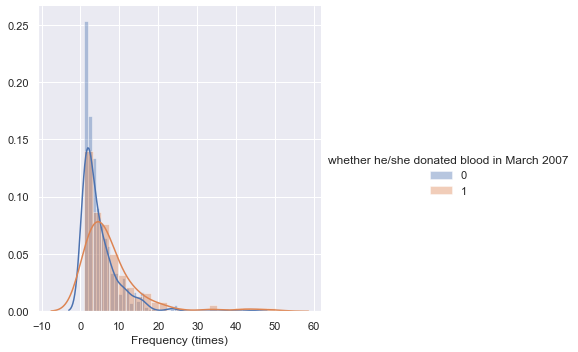

C:\Users\krkrs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\krkrs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


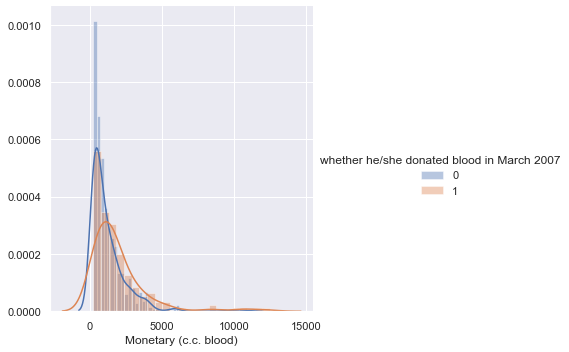

C:\Users\krkrs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\krkrs\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


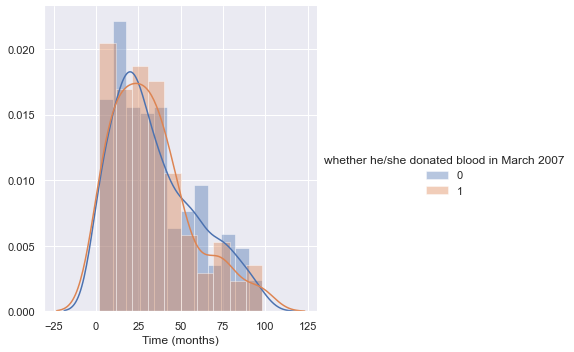

In [159]:
for ojha, feature in enumerate(list(dd.columns)[:-1]):
    fg = sns.FacetGrid(dd, hue='whether he/she donated blood in March 2007', height=5)
    fg.map(sns.distplot, feature ).add_legend()
    plt.show()

In [160]:
aa=dd[(~dd["whether he/she donated blood in March 2007"].isin(dd)) & (dd["whether he/she donated blood in March 2007"] ==0)]
print(aa.mean())
bb=dd[(~dd["whether he/she donated blood in March 2007"].isin(dd)) & (dd["whether he/she donated blood in March 2007"] ==1)]
print(bb.mean())

Recency (months)                                10.771930
Frequency (times)                                4.801754
Monetary (c.c. blood)                         1200.438596
Time (months)                                   34.770175
whether he/she donated blood in March 2007       0.000000
dtype: float64
Recency (months)                                 5.455056
Frequency (times)                                7.797753
Monetary (c.c. blood)                         1949.438202
Time (months)                                   32.719101
whether he/she donated blood in March 2007       1.000000
dtype: float64


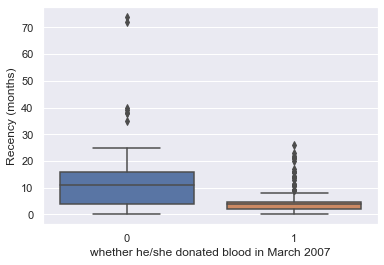

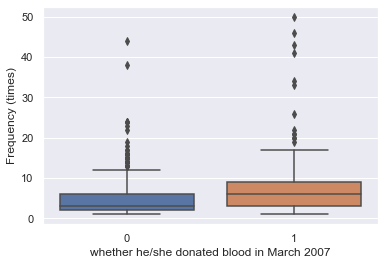

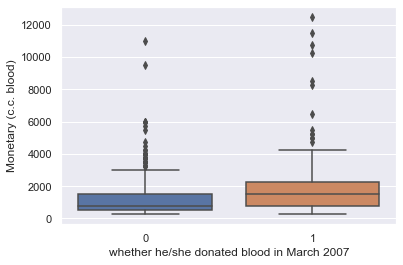

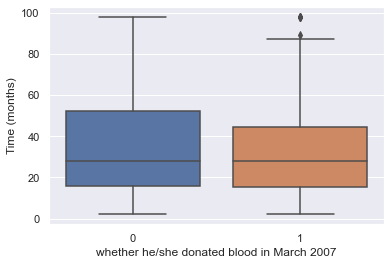

In [162]:
sns.boxplot(x='whether he/she donated blood in March 2007',y='Recency (months)', data=dd)
plt.show()
sns.boxplot(x='whether he/she donated blood in March 2007',y='Frequency (times)', data=dd)
plt.show()
sns.boxplot(x='whether he/she donated blood in March 2007',y='Monetary (c.c. blood)', data=dd)
plt.show()
sns.boxplot(x='whether he/she donated blood in March 2007',y='Time (months)', data=dd)
plt.show()

<AxesSubplot:xlabel='Recency (months)', ylabel='Frequency (times)'>

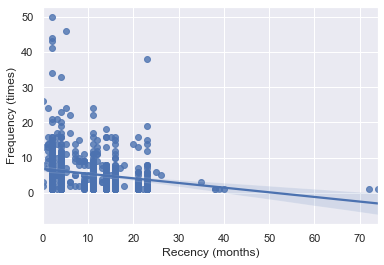

In [163]:
sns.regplot(x=dd['Recency (months)'], y=dd['Frequency (times)'])

<AxesSubplot:xlabel='Recency (months)', ylabel='Monetary (c.c. blood)'>

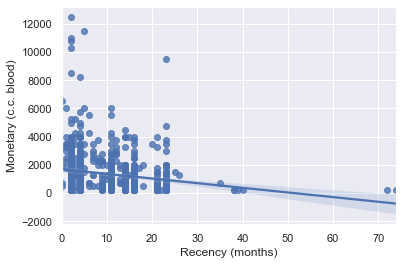

In [164]:
sns.regplot(x=dd['Recency (months)'], y=dd['Monetary (c.c. blood)'])

<AxesSubplot:xlabel='Recency (months)', ylabel='Time (months)'>

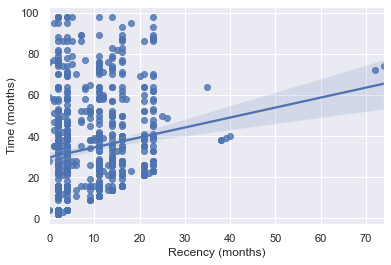

In [165]:
sns.regplot(x=dd['Recency (months)'], y=dd['Time (months)'])

<AxesSubplot:xlabel='Monetary (c.c. blood)', ylabel='Time (months)'>

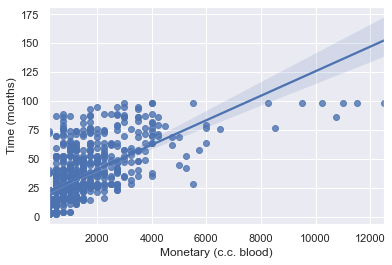

In [166]:
sns.regplot(x=dd['Monetary (c.c. blood)'], y=dd['Time (months)'])

<AxesSubplot:xlabel='Frequency (times)', ylabel='Time (months)'>

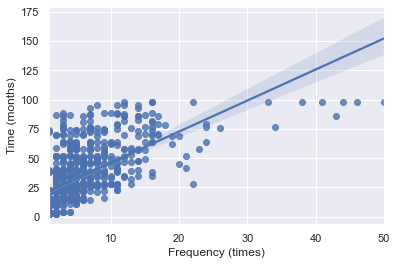

In [167]:
sns.regplot(x=dd['Frequency (times)'], y=dd['Time (months)'])

<AxesSubplot:xlabel='Frequency (times)', ylabel='Monetary (c.c. blood)'>

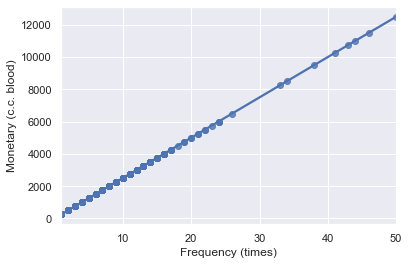

In [168]:
sns.regplot(x=dd['Frequency (times)'], y=dd['Monetary (c.c. blood)'])

In [169]:
le = LabelEncoder()
le.fit(dd['whether he/she donated blood in March 2007'].values)
y = le.transform(dd['whether he/she donated blood in March 2007'].values)
X = dd.drop('whether he/she donated blood in March 2007', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=seed)

Text(0, 0.5, 'accuracy')

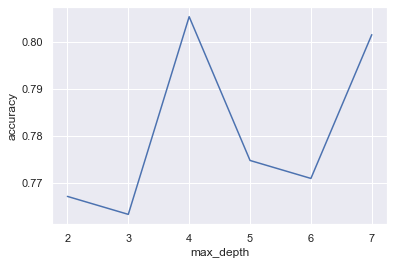

In [170]:
max_depth_range = list(range(2, 8))
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(criterion='entropy',
                              min_samples_split=7,
                              max_depth= depth,
                              random_state=seed)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score) 
plt.plot(max_depth_range,accuracy)
plt.xlabel('max_depth')
plt.ylabel('accuracy')

In [171]:
tree = DecisionTreeClassifier(criterion='entropy',
                              min_samples_split=7,
                              max_depth=6,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.7709923664122137


Confusion Matrix is
[[192   8]
 [ 52  10]]


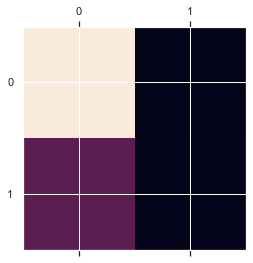

In [172]:
print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [173]:
print(classification_report(y_test, y_pred, labels=dd['whether he/she donated blood in March 2007'].unique()))

              precision    recall  f1-score   support

           1       0.56      0.16      0.25        62
           0       0.79      0.96      0.86       200

    accuracy                           0.77       262
   macro avg       0.67      0.56      0.56       262
weighted avg       0.73      0.77      0.72       262



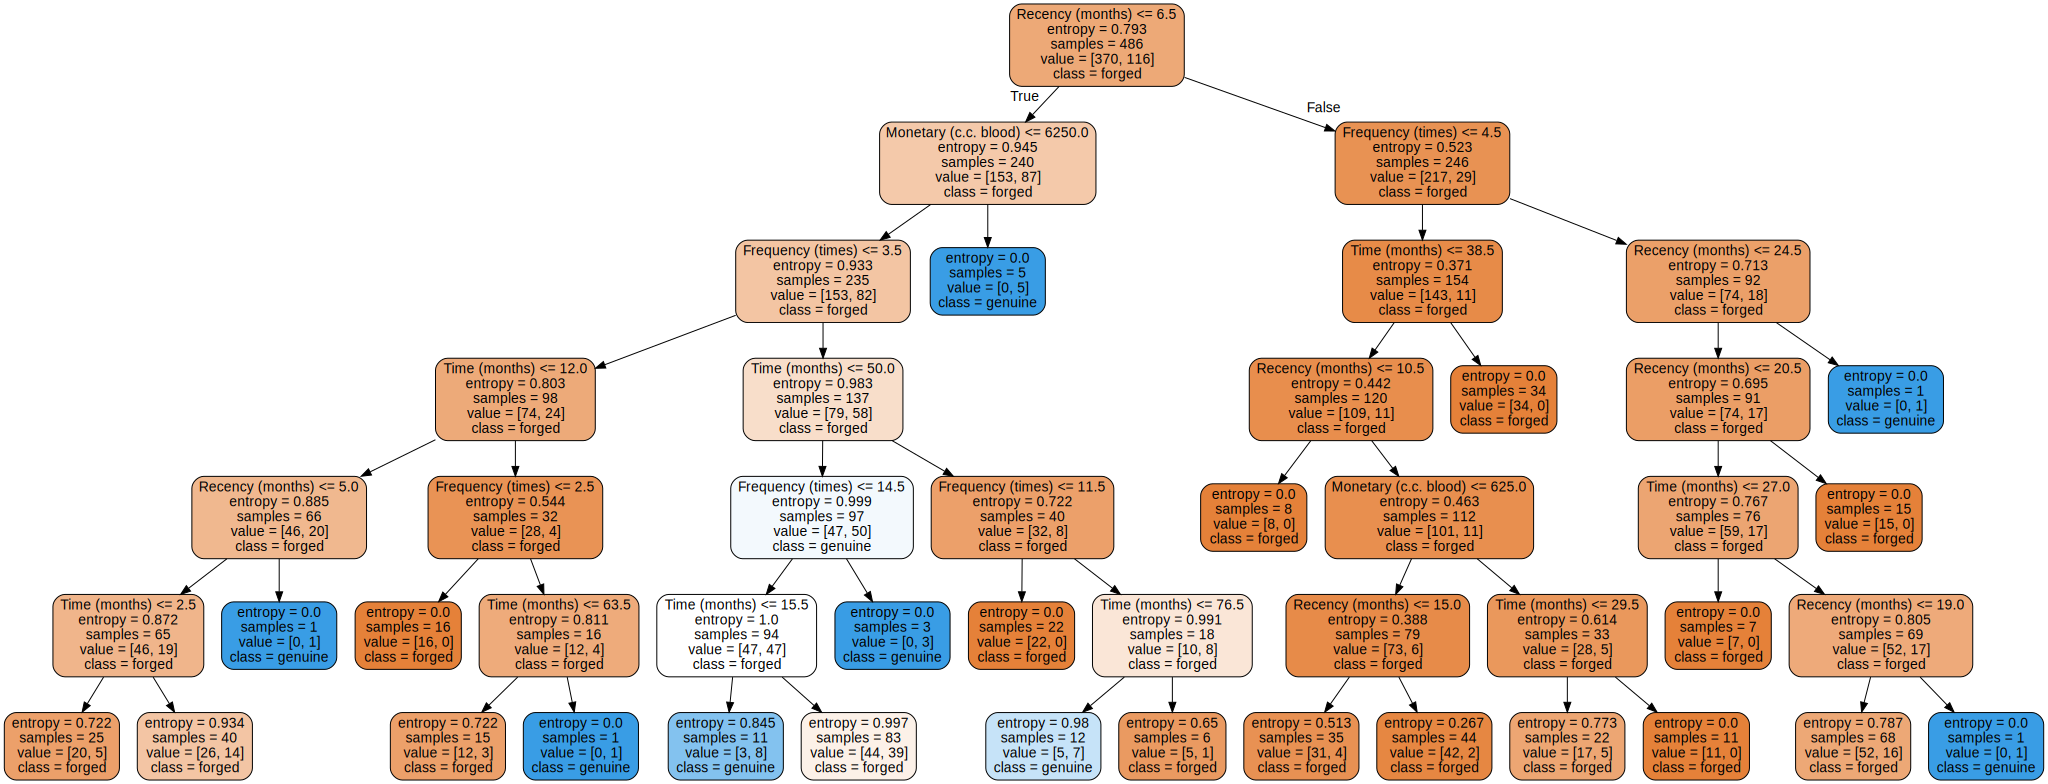

In [183]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['forged','genuine']
    graph_data = export_graphviz(tree,
                                 feature_names=dataframe.drop(label_col, axis=1).columns,
                                 class_names=label_names,
                                 filled=True,
                                 rounded=True,
                                 out_file=None)
    graph = graphviz.Source(graph_data)
    graph.render(plot_title, view = True)
    return graph
tree_graph = plot_tree(tree, dd, 'whether he/she donated blood in March 2007', le, 'Tree DataSet Blood Transfusion')
tree_graph